In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Titanic dataset
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Display the first 5 rows of the dataset
titanic.head()

# Check the shape of the dataset
titanic.shape

# Delete Nan values
titanic = titanic.dropna()

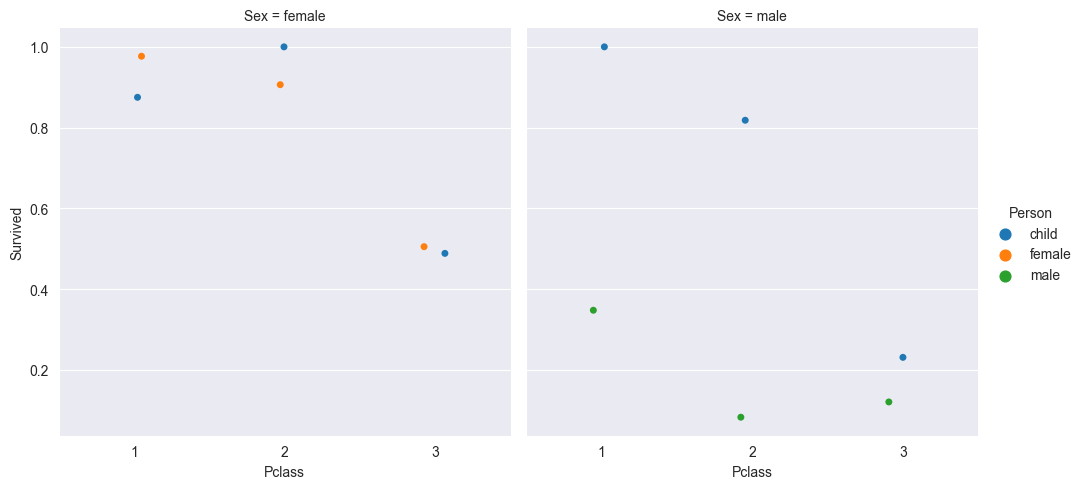

In [3]:
# Classify passengers by age
def get_person(passenger):
    age, sex = passenger
    return 'child' if age < 18 else sex


titanic['Person'] = titanic[['Age', 'Sex']].apply(get_person, axis=1)


# Create a new dataframe by their class, gender, and age group, and calculates the survival rate:
survival_rate = titanic.groupby(['Pclass', 'Person', 'Sex'])['Survived'].mean().reset_index()

# We can now use seaborn to create a bar chart that visualizes the survival rate by passenger class, gender, and age group:
sns.set_style('darkgrid')
sns.catplot(x='Pclass', y='Survived', hue='Person', col='Sex', data=survival_rate)

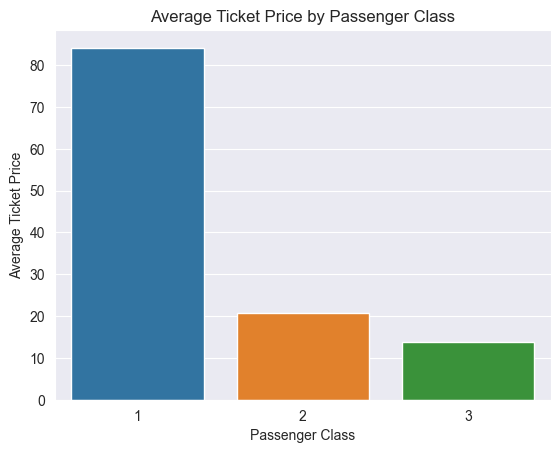

In [4]:
# Group titanic dataset by passenger class and calculate the mean ticket price for each class
class_ticket_price = titanic.groupby('Pclass')['Fare'].mean()

# Create a bar plot with the mean ticket price for each passenger class
sns.barplot(x=class_ticket_price.index, y=class_ticket_price.values)

# Add axis labels and a title
plt.xlabel('Passenger Class')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Price by Passenger Class')

# Display the plot
plt.show()

<AxesSubplot:xlabel='Family_size', ylabel='Survived'>

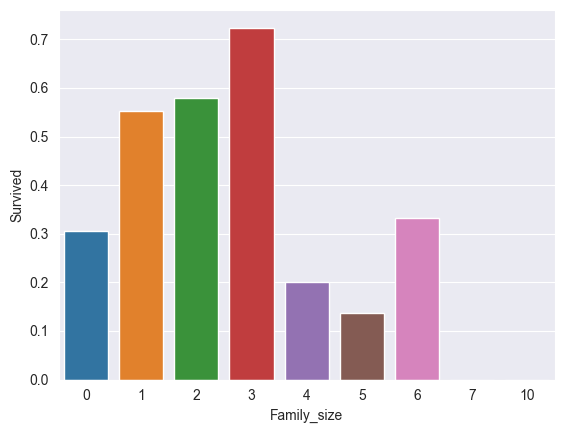

In [5]:
# Create new column for family size
titanic['Family_size'] = titanic['Siblings/Spouses Aboard'] + titanic['Parents/Children Aboard']

# Calculate survival rate by family size
family_survival_rate = titanic.groupby('Family_size')['Survived'].mean().reset_index()

# Create bar plot of family size and survival rate
sns.barplot(x='Family_size', y='Survived', data=family_survival_rate)

<AxesSubplot:xlabel='age_group', ylabel='Survived'>

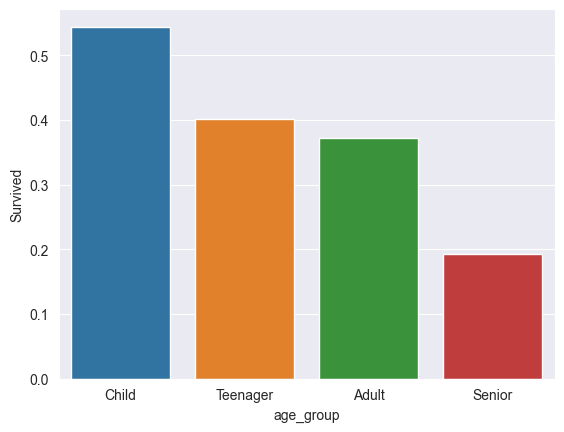

In [6]:
# Divide passengers into age groups
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
titanic['age_group'] = pd.cut(titanic['Age'], bins=bins, labels=labels, include_lowest=True)

# Calculate survival rate by age group
age_survival_rate = titanic.groupby('age_group')['Survived'].mean().reset_index()

# Create bar plot of age group and survival rate
sns.barplot(x='age_group', y='Survived', data=age_survival_rate)

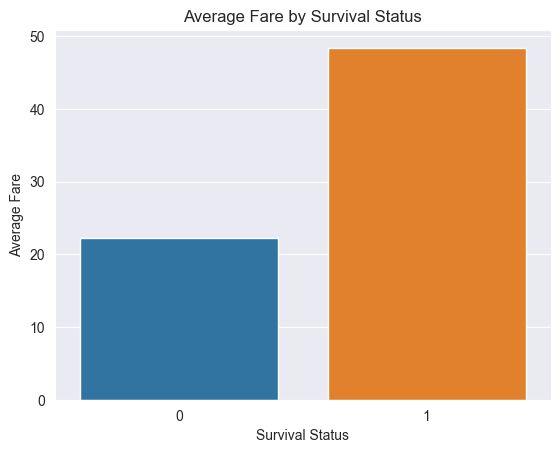

In [7]:
# Group titanic dataset by survival status and calculate the mean fare for each group
survival_fare = titanic.groupby('Survived')['Fare'].mean()

# Create a bar plot with the mean fare for each survival category
sns.barplot(x=survival_fare.index, y=survival_fare.values)

# Add axis labels and a title
plt.xlabel('Survival Status')
plt.ylabel('Average Fare')
plt.title('Average Fare by Survival Status')

# Display the plot
plt.show()

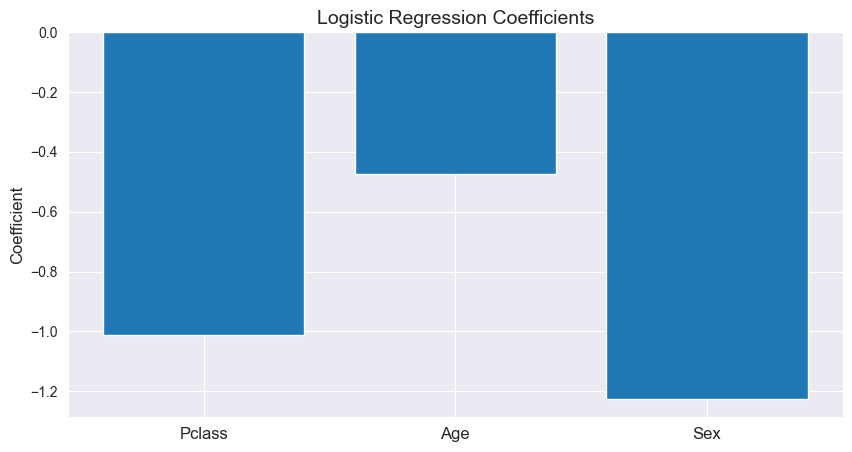

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Relable 'Sex' column as binary variable
rele = LabelEncoder()
titanic['Sex'] = rele.fit_transform(titanic['Sex'])

# Define the input features and target variable
X = titanic[['Pclass', 'Age', 'Sex']]
y = titanic['Survived']

# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a logistic regression model
logreg = LogisticRegression(solver='saga', max_iter=1000)
logreg.fit(X_scaled, y)

# Plot the coefficients of the logistic regression model
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), logreg.coef_[0])
plt.xticks(range(X.shape[1]), X.columns, fontsize=12)
plt.ylabel('Coefficient', fontsize=12)
plt.title('Logistic Regression Coefficients', fontsize=14)
plt.show()
